# Régression linéaire

Ce notebook s'intéresse à la façon d'interpréter les résultats d'une régression linéaire lorsque les variables sont corrélées puis il explore une façon d'associer arbre de décision et régression linéaire pour construire une régression linéaire par morceaux.

In [2]:
%matplotlib inline

## Un cas simple

Une façon d'interpréter des résultats statistiques est de les calculer dans un cas où la réponse cherchée est connue. On simule un modèle simple $Y=\alpha X_1 + 0.X_2 + \epsilon$ et on cale une régression linéaire. On suppose que $X_1, X_2, \epsilon$ sont des variables aléatoires gaussiennes de même variance et moyenne.

In [3]:
import numpy.random as npr

eps = npr.normal(1000)
X = npr.normal(size=(1000, 3))
alpha = 2
Y = alpha * X[:, 0] + X[:, 2]
X.shape, Y.shape

((1000, 3), (1000,))

In [4]:
from numpy import corrcoef

corrcoef(X.T)

array([[ 1.        , -0.0312982 ,  0.05188551],
       [-0.0312982 ,  1.        , -0.00356494],
       [ 0.05188551, -0.00356494,  1.        ]])

In [5]:
from statsmodels.regression.linear_model import OLS

In [6]:
model = OLS(Y, X[:, :2])
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2204.
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:34:12   Log-Likelihood:                -1385.2
No. Observations:                1000   AIC:                             2774.
Df Residuals:                     998   BIC:                             2784.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0519      0.031     66.347      0.000       1.991       2.113
x2            -0.0032      0.033     -0.097      0.922      -0.067       0.061
==============================================================================
Omnibus:                        0.709   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.674
Skew:                           0.063   Prob(JB):                        0.714
Kurtosis:                       3.010   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
results.rsquared, results.rsquared_adj

(0.8153831029946165, 0.8150131292531227)

On vérifie que le coefficient devant $X_1$ est non nul (P-value nulle, 0 n'est pas l'intervalle de confiance). Le coefficient devant $X_2$ n'est pas nul mais presque, la P-value est élevée, le coefficient $R^2$ est élevé. Dessinons.

c:\python370_x64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


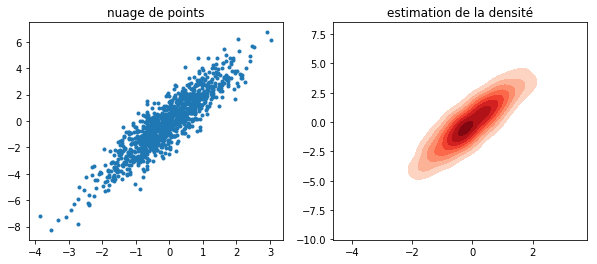

In [8]:
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(X[:, 0], Y, ".")
seaborn.kdeplot(X[:, 0], Y, cmap="Reds", shade=True, shade_lowest=False, ax=ax[1])
ax[0].set_title("nuage de points")
ax[1].set_title("estimation de la densité");

## Evolution de R2

Dans la régression précédente, le coefficient $R^2$ transcrit en quelque sorte la part du bruit $\epsilon$ par rapport au terme $\alpha X_1$. Faisons varier $\alpha$.

In [9]:
alphas = []
r2s = []
for a in [0.1 * i for i in range(50)]:
    Y = a * X[:, 0] + X[:, 2]
    model = OLS(Y, X[:, :2])
    results = model.fit()
    alphas.append(a)
    r2s.append(results.rsquared)

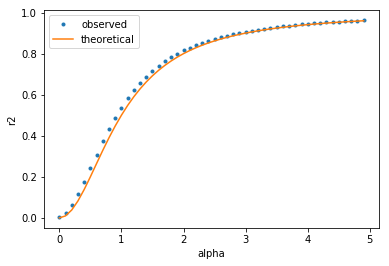

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(alphas, r2s, ".", label="observed")
ax.plot(alphas, [a**2 / (1 + a**2) for a in alphas], label="theoretical")
ax.set_xlabel("alpha")
ax.set_ylabel("r2")
ax.legend();

Dans ce cas de régression simple, la valeur à prédire est $y_i$, la valeur prédite est $\hat{y_i}=\alpha X_{1i}$ et la moyenne $\bar{y} = \alpha \bar{X_1} + \bar{\epsilon} = 0$.

$$R^2 = 1 - \frac{\sum_{i=1}^n (\hat{y_i}-\bar{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}=1-\frac{\mathbb{V}\epsilon}{\alpha^2\mathbb{V}X_1+\mathbb{V}\epsilon} = 1 - \frac{1}{1+\alpha^2}=\frac{\alpha^2}{1+\alpha^2}$$

## Deux variables corrélées

On ne change pas le modèle mais on fait en sorte que $X_2=X_1$. Les deux variables sont corrélées.

In [11]:
X[:, 1] = X[:, 0]
Y = 2 * X[:, 0] + X[:, 2]
model = OLS(Y, X[:, :2])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     4271.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:06:03   Log-Likelihood:                -1411.2
No. Observations:                1000   AIC:                             2824.
Df Residuals:                     999   BIC:                             2829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0288      0.016     65.349      0.000       0.998       1.060
x2             1.0288      0.016     65.349      0.000       0.998       1.060
==============================================================================
Omnibus:                        8.165   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                6.024
Skew:                          -0.064   Prob(JB):                       0.0492
Kurtosis:                       2.642   Cond. No.                     1.61e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.69e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
model.rank

1

Les variables corrélées n'ont pas l'air de déranger l'algorithme de résolution car il utilise la méthode [SVD](https://en.wikipedia.org/wiki/Singular-value_decomposition) pour résoudre le même problème dans un espace de moindre dimension. Le problème survient que les deux variables ne sont pas complétement corrélées. On étudie le modèle $Y \sim X_1 + X'_2$ avec $X'_2 = \alpha X_1 + (1-\alpha) X_2$ et on réduit la variance du bruit pour en diminuer les effets.

In [13]:
X_ = npr.normal(size=(1000, 3))

In [14]:
alphas = [0.9 + i * 0.01 for i in range(11)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1 - a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + 0.1 * X[:, 2]
    model = OLS(Y, X[:, :2])
    results = model.fit()
    res.append(
        dict(
            alpha=a,
            r2=results.rsquared,
            rank=model.rank,
            c1=results.params[0],
            c2=results.params[1],
        )
    )

import pandas

df = pandas.DataFrame(res)
df = df.set_index("alpha")
df

,c1,c2,r2,rank
alpha,,,,
0.90,0.976370,1.028982,0.997391,2
0.91,0.973150,1.032202,0.997416,2
0.92,0.969125,1.036227,0.997440,2
0.93,0.963950,1.041402,0.997464,2
0.94,0.957049,1.048303,0.997489,2
0.95,0.947389,1.057963,0.997513,2
0.96,0.932898,1.072454,0.997536,2
0.97,0.908747,1.096605,0.997560,2
0.98,0.860444,1.144908,0.997583,2


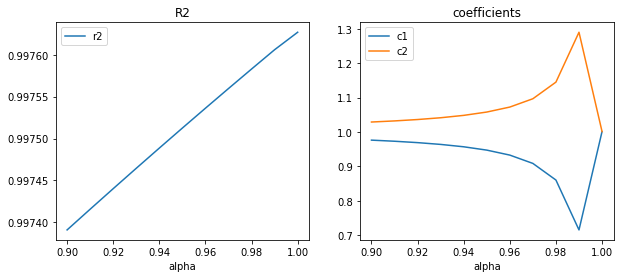

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df[["r2"]].plot(ax=ax[0])
df[["c1", "c2"]].plot(ax=ax[1])
ax[0].set_title("R2")
ax[1].set_title("coefficients");

Le $r^2$ augmente quand la corrélation augmente mais les coefficients sont moins fiables. Les résultats devraient être sensiblement identiques en théorie mais en pratique, plus le déterminant devient proche de zéro, plus l'ordinateur est limité par sa précision numérique. Pour en savoir plus, vous pouvez lire un examen écrit que j'ai rédigé, en python bien sûr : [Examen Programmation ENSAE première année
2006](http://www.xavierdupre.fr/site2013/enseignements/tdnote/ecrit_2006.pdf). Cette précision est aux alentours de $10^{-15}$ ce qui correspond à la précision numérique des [double](https://en.wikipedia.org/wiki/Double-precision_floating-point_format).

In [16]:
alphas = [1 - 10 ** (-i) for i in range(10, 18)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1 - a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + X[:, 2]
    model = OLS(Y, X[:, :2])
    results = model.fit()
    res.append(
        dict(
            alpha_1=a - 1,
            r2=results.rsquared,
            rank=model.rank,
            c1=results.params[0],
            c2=results.params[1],
        )
    )

import pandas

df = pandas.DataFrame(res)
df = df.set_index("alpha_1")
df

,c1,c2,r2,rank
alpha_1,,,,
-1.000000e-10,-2.898180e+08,2.898180e+08,0.811519,2
-1.000000e-11,-2.898201e+09,2.898201e+09,0.811519,2
-9.999779e-13,-2.898941e+10,2.898941e+10,0.811519,2
-1.000311e-13,-2.891422e+11,2.891422e+11,0.811518,2
-9.992007e-15,-2.915101e+12,2.915101e+12,0.811508,2
-9.992007e-16,1.012789e+00,1.012789e+00,0.811359,2
-1.110223e-16,1.012789e+00,1.012789e+00,0.811359,1
0.000000e+00,1.012789e+00,1.012789e+00,0.811359,1


On fait un dernier test avec [scikit-learn](http://scikit-learn.org/stable/) pour vérifier que l'algorithme de résolution donne des résultats similaires pour un cas où le déterminant est quasi-nul.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

alphas = [0.9 + i * 0.01 for i in range(11)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1 - a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + X[:, 2]
    model = LinearRegression()
    model.fit(X[:, :2], Y)
    r2 = r2_score(Y, model.predict(X[:, :2]))
    res.append(dict(alpha=a, c1=model.coef_[0], c2=model.coef_[1], r2=r2))

import pandas

df = pandas.DataFrame(res)
df = df.set_index("alpha")
df

,c1,c2,r2
alpha,,,
0.90,7.601931e-01,1.293903e+00,0.796916
0.91,7.275372e-01,1.326559e+00,0.798417
0.92,6.867173e-01,1.367379e+00,0.799911
0.93,6.342346e-01,1.419862e+00,0.801399
0.94,5.642576e-01,1.489839e+00,0.802880
0.95,4.662898e-01,1.587807e+00,0.804355
0.96,3.193382e-01,1.734758e+00,0.805823
0.97,7.441878e-02,1.979678e+00,0.807283
0.98,-4.154200e-01,2.469516e+00,0.808736


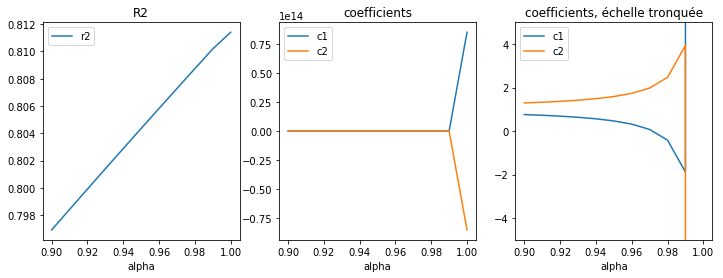

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
df[["c1", "c2"]].plot(ax=ax[1])
df[["c1", "c2"]].plot(ax=ax[2])
df[["r2"]].plot(ax=ax[0])
ax[0].set_title("R2")
ax[1].set_title("coefficients")
ax[2].set_ylim([-5, 5])
ax[2].set_title("coefficients, échelle tronquée");

Le second graphe est trompeur mais il ne faut pas oublier de regarder l'échelle de l'axe des ordonnées.

## Indicatrices

$X_1$ est une variable aléatoire gaussienne. On teste maintenant un modèle $Y = X'_1 + X'_2 + \epsilon$ avec $X'_1 = X_1 \mathbb{1}_{X_1 < 0}$ et $X'_2 = X_1 \mathbb{1}_{X_1 \geqslant 0}$.

In [19]:
X = npr.normal(size=(1000, 3))
X[:, 1] = X[:, 0]
X[X[:, 0] >= 0, 0] = 0
X[X[:, 1] < 0, 1] = 0
Y = X[:, 0] + X[:, 1] + X[:, 2]
corrcoef(X.T)

array([[ 1.        ,  0.47358312, -0.03083914],
       [ 0.47358312,  1.        , -0.01293737],
       [-0.03083914, -0.01293737,  1.        ]])

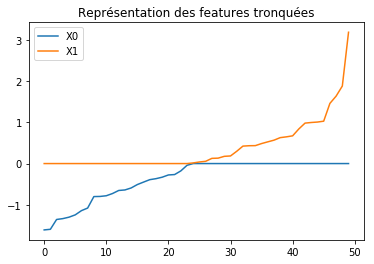

In [20]:
from pandas import DataFrame

names = ["X%d" % i for i in range(X.shape[1] - 1)]
ax = (
    DataFrame(X[:50, :2], columns=names)
    .sort_values(names)
    .reset_index(drop=True)
    .plot()
)
ax.set_title("Représentation des features tronquées");

In [21]:
model = OLS(Y, X[:, :3])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.212e+33
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:56:29   Log-Likelihood:                 33713.
No. Observations:                1000   AIC:                        -6.742e+04
Df Residuals:                     997   BIC:                        -6.740e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.42e-17   4.14e+16      0.000       1.000       1.000
x2             1.0000   2.39e-17   4.18e+16      0.000       1.000       1.000
x3             1.0000   1.73e-17   5.78e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        4.249   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.338
Skew:                          -0.107   Prob(JB):                        0.114
Kurtosis:                       3.242   Cond. No.                         1.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On découpe en trois.

In [22]:
import numpy

X = npr.normal(size=(1000, 4))
for i in range(3):
    X[:, i] = X_[:, 0]
X[:, 3] = X_[:, 2]
X[X_[:, 0] > -1, 0] = 0
X[(X_[:, 0] < -1) | (X_[:, 0] > 1), 1] = 0
X[X_[:, 0] < 1, 2] = 0
Y = X[:, 0] + X[:, 1] + X[:, 2] + X[:, 3]
corrcoef(X.T)

array([[ 1.        , -0.00347584,  0.16846101,  0.06722762],
       [-0.00347584,  1.        ,  0.00326437, -0.04707208],
       [ 0.16846101,  0.00326437,  1.        ,  0.08754832],
       [ 0.06722762, -0.04707208,  0.08754832,  1.        ]])

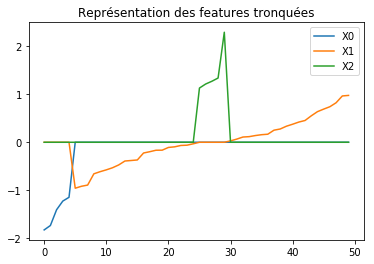

In [23]:
from pandas import DataFrame

names = ["X%d" % i for i in range(X.shape[1] - 1)]
ax = (
    DataFrame(X[:50, :3], columns=names)
    .sort_values(names)
    .reset_index(drop=True)
    .plot()
)
ax.set_title("Représentation des features tronquées");

In [24]:
model = OLS(Y, X[:, :4])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.910e+32
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:57:27   Log-Likelihood:                 32608.
No. Observations:                1000   AIC:                        -6.521e+04
Df Residuals:                     996   BIC:                        -6.519e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   8.75e-17   1.14e+16      0.000       1.000       1.000
x2             1.0000   1.22e-16   8.23e+15      0.000       1.000       1.000
x3             1.0000   8.33e-17    1.2e+16      0.000       1.000       1.000
x4             1.0000   5.23e-17   1.91e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      457.967   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1967.636
Skew:                          -2.198   Prob(JB):                         0.00
Kurtosis:                       8.282   Cond. No.                         2.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Régression linéaire par morceaux

On se place dans un cas particulier où le problème est linéaire par morceaux :

$$Y = -2 X_1 \mathbb{1}_{X_1 + \epsilon_1 <0} + 4 X_1 \mathbb{1}_{X + \epsilon_1 > 0} + \epsilon_2$$

La régression donne de très mauvais résultat sur ce type de problèmes mais on cherche une façon systématique de découper le problème en segments linéaires.

In [25]:
X = npr.normal(size=(1000, 4))
alpha = [4, -2]
t = (X[:, 0] + X[:, 3] * 0.5) > 0
switch = numpy.zeros(X.shape[0])
switch[t] = 1
Y = alpha[0] * X[:, 0] * t + alpha[1] * X[:, 0] * (1 - t) + X[:, 2]

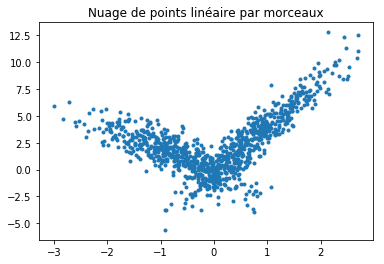

In [26]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".")
ax.set_title("Nuage de points linéaire par morceaux");

In [27]:
model = OLS(Y, X[:, :1])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           2.69e-23
Time:                        10:59:28   Log-Likelihood:                -2594.9
No. Observations:                1000   AIC:                             5192.
Df Residuals:                     999   BIC:                             5197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0252      0.101     10.197      0.000       0.828       1.222
==============================================================================
Omnibus:                        3.882   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.834
Skew:                           0.151   Prob(JB):                        0.147
Kurtosis:                       3.015   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
yp = results.predict(X[:, :1])

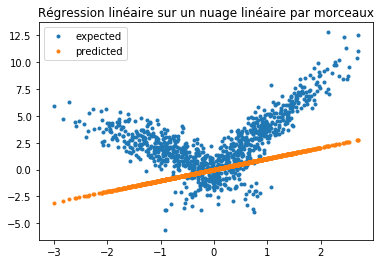

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()
ax.set_title("Régression linéaire sur un nuage linéaire par morceaux");

Passons à un arbre de décision qui n'est pas le meilleur modèle mais on va détourner ses résultats pour revenir à un problème de régression par morceaux.

In [30]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=10, max_depth=3)
model.fit(X[:, :1], Y)
yp = model.predict(X[:, :1])

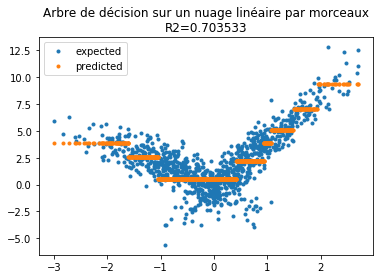

In [31]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()
r2 = r2_score(Y, model.predict(X[:, :1]))
ax.set_title("Arbre de décision sur un nuage linéaire par morceaux\nR2=%f" % r2);

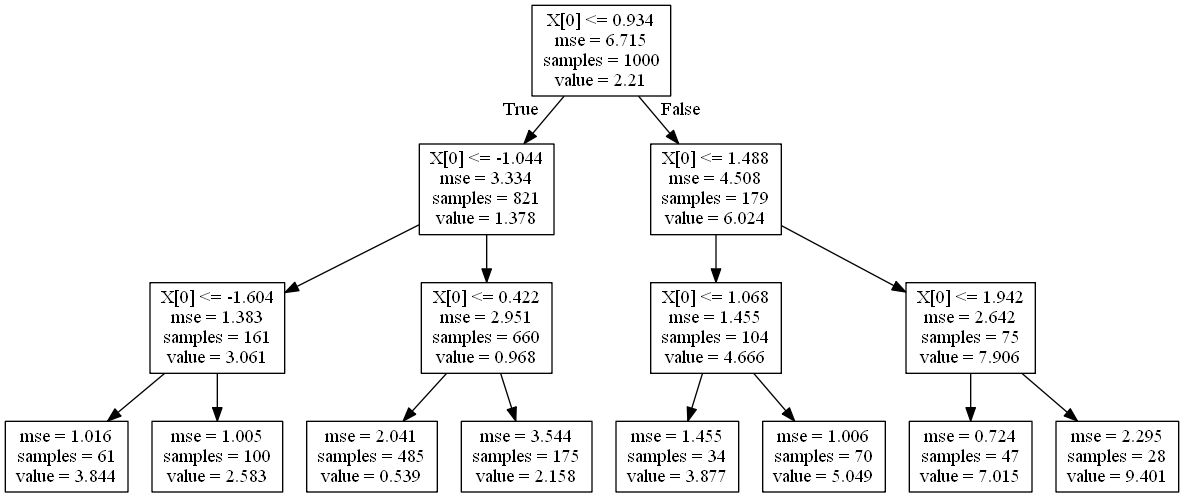

In [32]:
import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(model)

src = graphviz.Source(dot)
src.render("tree_dot.gv")

On extrait tous les seuils de l'arbre et on ajoute les milieux de segments.

In [33]:
th = list(sorted(set(model.tree_.threshold)))
th += [(th[i] + th[i - 1]) / 2 for i in range(1, len(th))]
th = list(sorted(th))
th

[-2.0,
 -1.8018612563610077,
 -1.6037225127220154,
 -1.323736995458603,
 -1.0437514781951904,
 -0.3109976723790169,
 0.4217561334371567,
 0.678125374019146,
 0.9344946146011353,
 1.0011553764343262,
 1.067816138267517,
 1.2776717841625214,
 1.4875274300575256,
 1.7147845923900604,
 1.9420417547225952]

On fait une régression sur les variables $W_{i>0} = X_1 \mathbb{1}_{X_1 > t_i}$, $W_0 = X_1$ où les $(t_i)$ sont les seuils.

In [34]:
W = numpy.zeros((X.shape[0], len(th) + 1))
x = X[:, 0]
W[:, 0] = x
for i in range(len(th)):
    W[x > th[i], i + 1] = x[x > th[i]]

In [35]:
model = OLS(Y, W)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     346.9
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        11:07:03   Log-Likelihood:                -1697.7
No. Observations:                1000   AIC:                             3427.
Df Residuals:                     984   BIC:                             3506.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.8316      0.124    -14.806      0.000      -2.074      -1.589
x2            -0.0573      0.210     -0.273      0.785      -0.469       0.354
x3            -0.2440      0.235     -1.038      0.300      -0.705       0.217
x4             0.3291      0.218      1.508      0.132      -0.099       0.757
x5            -0.3610      0.206     -1.756      0.079      -0.764       0.042
x6             0.5528      0.197      2.811      0.005       0.167       0.939
x7             3.2628      0.395      8.253      0.000       2.487       4.039
x8             1.4566      0.449      3.244      0.001       0.576       2.338
x9             0.2701      0.311      0.869      0.385      -0.340       0.880
x10            0.7213      0.374      1.928      0.054      -0.013       1.456
x11           -0.4599      0.457     -1.006      0.315      -1.357       0.437
x12            0.4177      0.378      1.105      0.269      -0.324       1.159
x13           -0.2703      0.253     -1.069      0.285      -0.766       0.226
x14            0.5325      0.226      2.360      0.018       0.090       0.975
x15           -0.3703      0.229     -1.618      0.106      -0.819       0.079
x16            0.1996      0.194      1.026      0.305      -0.182       0.581
==============================================================================
Omnibus:                      228.022   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.200
Skew:                          -1.110   Prob(JB):                    3.01e-156
Kurtosis:                       6.502   Cond. No.                         36.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dessinons les résultats de la prédictions.

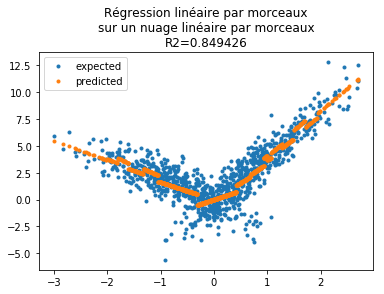

In [36]:
yp = results.predict(W)
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()
ax.set_title(
    "Régression linéaire par morceaux\nsur un nuage linéaire par morceaux\nR2=%f"
    % results.rsquared
);

Le modèle nous suggère de ne garder que quelques seuils. En s'appuyant sur les p-values :

In [37]:
keep = numpy.arange(len(results.pvalues))[results.pvalues < 0.05]
keep

array([ 0,  5,  6,  7, 13])

In [38]:
W2 = W[:, keep]

In [39]:
model = OLS(Y, W2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1094.
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        11:07:38   Log-Likelihood:                -1708.6
No. Observations:                1000   AIC:                             3427.
Df Residuals:                     995   BIC:                             3452.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9504      0.066    -29.574      0.000      -2.080      -1.821
x2             0.3384      0.148      2.287      0.022       0.048       0.629
x3             3.2628      0.397      8.209      0.000       2.483       4.043
x4             2.0247      0.385      5.260      0.000       1.269       2.780
x5             0.4635      0.119      3.901      0.000       0.230       0.697
==============================================================================
Omnibus:                      248.807   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.417
Skew:                          -1.190   Prob(JB):                    7.84e-181
Kurtosis:                       6.774   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

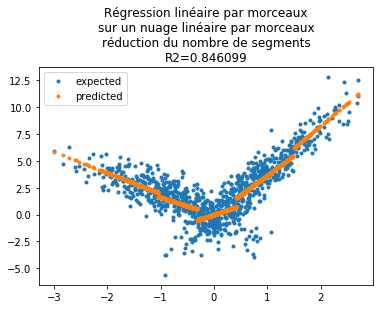

In [40]:
yp = results.predict(W2)
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()
ax.set_title(
    "Régression linéaire par morceaux\nsur un nuage linéaire par morceaux\n"
    + "réduction du nombre de segments\nR2=%f" % results.rsquared
);

Le coefficient $R^2$ est quasiment identique pour un nombre de segments moindre. Je me suis amusé à rendre ce code plus générique pour comparer la première étape, le découpage en morceaux, via deux modèles, un arbre de décision et le nouvel objet [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html) qui segmente une variable sans tenir compte de la cible. La régression n'est plus nécessaire linéaire : [Piecewise linear regression](http://www.xavierdupre.fr/app/mlinsights/helpsphinx/notebooks/piecewise_linear_regression.html). Je me suis également amusé à faire de même pour une classification par morceaux [PiecewiseClassifier](http://www.xavierdupre.fr/app/mlinsights/helpsphinx/mlinsights/mlmodel/piecewise_estimator.html?mlinsights.mlmodel.piecewise_estimator.PiecewiseClassifier). Celle-ci pose quelques soucis pratiques car toutes les classes ne sont pas forcément représentées dans chaque compartiment...